# create a fusion of differnet notification sounds

process:

1. import all sounds from the directory
2. encode them
3. average the encodings
4. export .npy and .wav file

In [3]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
from skimage.transform import resize
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

/home/bird/miniconda3/envs/nsynth/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/bird/miniconda3/envs/nsynth/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


### load all audio files and encode them

In [10]:
# audio parameters
audio_file_dir = os.path.join('in', 'notifications', 'normal_speed')
audio_length = 5  # in seconds
sample_rate = 16000
sample_length = sample_rate * audio_length

loaded in/notifications/normal_speed/notficationwav_13.wav. samples: 80000. expected samples: 80000
loaded in/notifications/normal_speed/notficationwav_7.wav. samples: 80000. expected samples: 80000
loaded in/notifications/normal_speed/notficationwav_12.wav. samples: 80000. expected samples: 80000
loaded in/notifications/normal_speed/notficationwav_17.wav. samples: 80000. expected samples: 80000
loaded in/notifications/normal_speed/notficationwav_28.wav. samples: 80000. expected samples: 80000
loaded in/notifications/normal_speed/notficationwav_37.wav. samples: 80000. expected samples: 80000


2022-06-19 14:27:57.173786: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:57.174149: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:57.174485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:57.174838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:57.175143: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-19 14:27:59.607959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:59.608301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:59.608588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:59.608912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:27:59.609202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-19 14:28:02.265018: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:02.265371: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:02.265662: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:02.265989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:02.266281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-19 14:28:04.693661: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:04.694005: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:04.694293: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:04.694625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:04.694916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-19 14:28:07.278612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:07.279110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:07.279454: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:07.279824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:07.280240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-19 14:28:09.654387: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:09.654747: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:09.655124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:09.655482: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 14:28:09.655805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


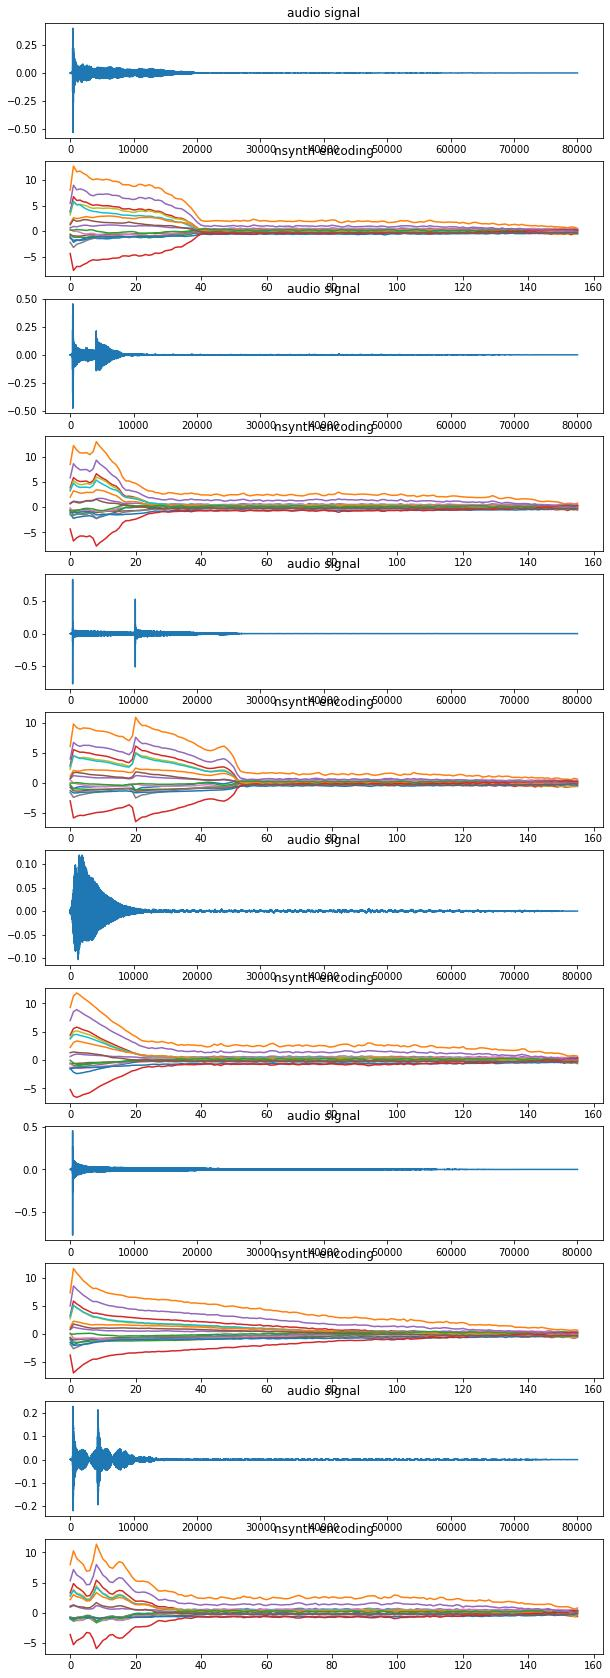

In [11]:
# load audio files into numpy arrays
audios = []
for path in glob.glob(os.path.join(audio_file_dir, '*.wav')):

    audio = utils.load_audio(path, sample_length=sample_length, sr=sample_rate)
    print(
        f'loaded {path}. samples: {audio.shape[0]}. expected samples: {sample_length}'
    )
    audios.append(audio)

# encode
encodings = [
    fastgen.encode(audio,
                   os.path.join('models', 'wavenet-ckpt', 'model.ckpt-200000'),
                   sample_length) for audio in audios
]

# plot encodings
fig, axs = plt.subplots(len(encodings) * 2,
                        1,
                        figsize=(10, len(encodings) * 2 * 2.5))
for index, (encoding, audio) in enumerate(zip(encodings, audios)):
    axs[index * 2].plot(audio)
    axs[index * 2].set_title('audio signal')
    axs[index * 2 + 1].plot(encoding[0])
    axs[index * 2 + 1].set_title('nsynth encoding')


### average out the encodings

for doing random deviations on the averaging instead and producing multiple fused outputs, see below.

Text(0.5, 1.0, 'Averaged NSynth Encoding')

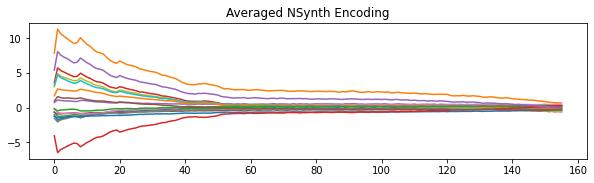

In [37]:
fused_encoding = encodings[0]
for encoding in encodings[1:]:
    fused_encoding += encoding

fused_encoding /= len(encodings)

fig, axs = plt.subplots(1, 1, figsize=(10, 2.5))
axs.plot(fused_encoding[0])
axs.set_title('Averaged NSynth Encoding')

### timestretch the audio

In [8]:
# timestretching helper function
def timestretch(encodings, factor):
    min_encoding, max_encoding = encoding.min(), encoding.max()
    encodings_norm = (encodings - min_encoding) / (max_encoding - min_encoding)
    timestretches = []
    for encoding_i in encodings_norm:
        stretched = resize(
            encoding_i,
            (int(encoding_i.shape[0] * factor), encoding_i.shape[1]),
            mode='reflect')
        stretched = (stretched * (max_encoding - min_encoding)) + min_encoding
        timestretches.append(stretched)
    return np.array(timestretches)

Text(0.5, 1.0, 'Averaged NSynth Encoding stretched')

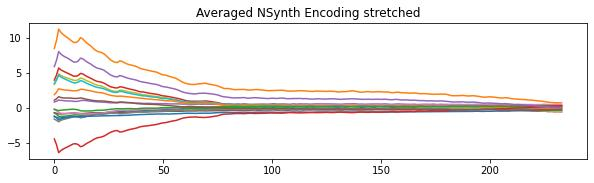

In [38]:
fused_encoding = timestretch(fused_encoding, 1.5)

fig, axs = plt.subplots(1, 1, figsize=(10, 2.5))
axs.plot(fused_encoding[0])
axs.set_title('Averaged NSynth Encoding stretched')

### save numpy array to .npy

In [ ]:
np.save(
    os.path.join('npy',
                 'fused.npy'),
    encoding)

### synthesize audio from averaged encoding

In [ ]:
fastgen.synthesize(
    encoding,
    save_paths=[os.path.join('out', 'fused.wav')],
    checkpoint_path=os.path.join('models', 'wavenet-ckpt',
                                 'model.ckpt-200000'),
    samples_per_save=sample_length)

### average the encodings with multiple deviations

In [16]:
# averaging parameters
output_count = 10
min_deviation = 0.9
max_deviation = 1.1

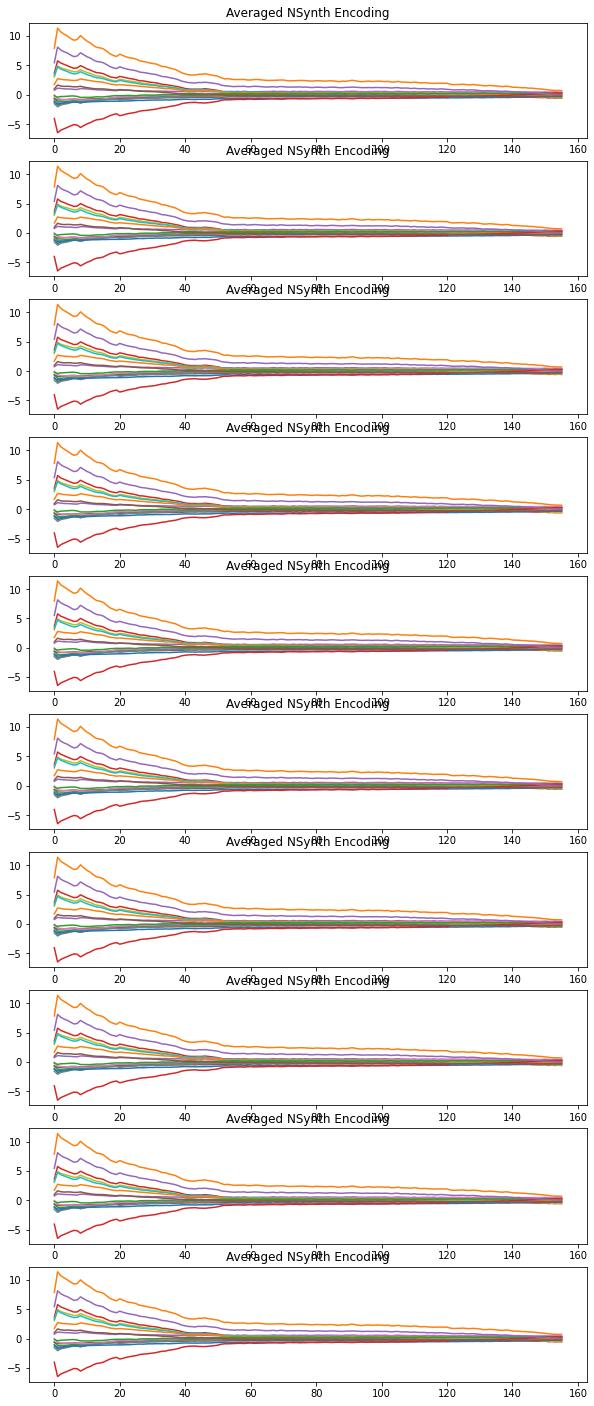

In [17]:
# fuse encodings randomly
fused_encodings_list = []
for i, _ in enumerate(range(output_count)):
    # shuffle the list in the beginning
    random.shuffle(encodings)

    # function for getting a factor for a random proportion
    # e.g. if there are 4 encodings, each would have a proportional factor of 1/4=0,25
    # this fuction randomizes this factor with a minimum and maximum devation
    def random_proportion(count: int, deviation_min: float,
                          deviation_max: float) -> float:
        return 1 / count * random.uniform(deviation_min, deviation_max)

    # total proportion
    remaining = 1

    fused_encoding = np.full_like(encodings[0], 0)
    for j, encoding in enumerate(encodings):
        proportion = random_proportion(
            len(encodings), min_deviation,
            max_deviation)  # calculate the proportion

        if proportion > remaining:
            proportion = remaining
            remaining = 0
        elif j == len(encodings) - 1:
            proportion = remaining

        fused_encoding += encoding * proportion  # add the proportion to total average

        remaining -= proportion  # subtract proportion from total proportion

    fused_encodings_list.append(fused_encoding)

# plot all fused encodings
fig, axs = plt.subplots(output_count, 1, figsize=(10, 2.5 * output_count))
for index, fused_encoding in enumerate(fused_encodings_list):
    axs[index].plot(fused_encoding[0])
    axs[index].set_title('Averaged NSynth Encoding')

# concat all fused encodings in numpy array for parallel processing
fused_encodings = np.concatenate(fused_encodings_list, axis=0)

### decode all variations and save as .wavs

In [47]:
# generate batchwise
fastgen.synthesize(fused_encodings,
                   save_paths=[
                       os.path.join(
                           'out',
                           f'fused_{i}.wav') for i in range(fused_encodings.shape[0])
                   ],
                   checkpoint_path=os.path.join('models', 'wavenet-ckpt',
                                                'model.ckpt-200000'),
                   samples_per_save=sample_length)


2022-06-17 16:05:42.332739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 16:05:42.333202: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 16:05:42.333573: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 16:05:42.334035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 16:05:42.334510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: out/fused_0.wav
INFO:tensorflow:Saving: out/fused_1.wav
INFO:tensorflow:Saving: out/fused_2.wav
INFO:tensorflow:Saving: out/fused_3.wav
INFO:tensorflow:Saving: out/fused_4.wav
INFO:tensorflow:Saving: out/fused_5.wav
INFO:tensorflow:Saving: out/fused_6.wav
INFO:tensorflow:Saving: out/fused_7.wav
INFO:tensorflow:Saving: out/fused_8.wav
INFO:tensorflow:Saving: out/fused_9.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tenso

### stretch and save as wav

In [18]:
fused_encodings = timestretch(fused_encodings, 0.8)

# generate batchwise
fastgen.synthesize(fused_encodings,
                   save_paths=[
                       os.path.join('out', f'fused_compressed0.8_{i}.wav')
                       for i in range(fused_encodings.shape[0])
                   ],
                   checkpoint_path=os.path.join('models', 'wavenet-ckpt',
                                                'model.ckpt-200000'),
                   samples_per_save=sample_length)

2022-06-19 15:21:45.164334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 15:21:45.164816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 15:21:45.165234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 15:21:45.165700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-19 15:21:45.166132: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: out/fused_compressed0.8_0.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_1.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_2.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_3.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_4.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_5.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_6.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_7.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_8.wav
INFO:tensorflow:Saving: out/fused_compressed0.8_9.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow